In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget 'https://raw.githubusercontent.com/Santanuedhec/Edhec_Car_Price_Prediction/refs/heads/main/train.csv' -O 'data.csv'

--2025-03-03 10:58:11--  https://raw.githubusercontent.com/Santanuedhec/Edhec_Car_Price_Prediction/refs/heads/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2201879 (2.1M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   2.10M  --.-KB/s    in 0.08s   

2025-03-03 10:58:12 (27.3 MB/s) - ‘data.csv’ saved [2201879/2201879]



In [ ]:
df1 = pd.read_csv('data.csv', on_bad_lines='skip')
df1.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


#Exploratory Data Analysis.

In [ ]:
df1.shape

(19237, 18)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
df1.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [ ]:
df1.duplicated().sum()

313

In [ ]:
df2 = df1.drop_duplicates()
df2.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
#Handling the leather interior column.
df2['Leather interior'].value_counts()

,count
Leather interior,
Yes,13731
No,5193


In [ ]:
df2['Leather interior'] = df2['Leather interior'].map(lambda x: 1 if x == 'Yes' else 0)
df2['Leather interior'].value_counts()

<ipython-input-10-25c8fb05e6b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Leather interior'] = df2['Leather interior'].map(lambda x: 1 if x == 'Yes' else 0)


,count
Leather interior,
1,13731
0,5193


In [ ]:
#Handling Mileage Column.
df2.Mileage= df2.Mileage.map(lambda x: x.rstrip(' km'))
df2.Mileage= df2.Mileage.astype('float')

<ipython-input-11-858143f04983>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Mileage= df2.Mileage.map(lambda x: x.rstrip(' km'))
<ipython-input-11-858143f04983>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Mileage= df2.Mileage.astype('float')


In [ ]:
df2.Mileage.unique()

array([186005., 192000., 200000., ..., 140607., 307325., 186923.])

In [ ]:
#Handling for doors.
df2['Doors'].value_counts()

,count
Doors,
04-May,18032
02-Mar,768
>5,124


In [ ]:
df2.Doors=df2.Doors.map(lambda x: x.rstrip('-May'))
df2.Doors=df2.Doors.map(lambda x: x.rstrip('-Mar'))
df2.Doors=df2.Doors.map(lambda x: x.lstrip('>'))
df2.Doors= df2.Doors.astype('int')
df2['Doors'].value_counts()

<ipython-input-14-aa70854ae2de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Doors=df2.Doors.map(lambda x: x.rstrip('-May'))
<ipython-input-14-aa70854ae2de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Doors=df2.Doors.map(lambda x: x.rstrip('-Mar'))
<ipython-input-14-aa70854ae2de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,count
Doors,
4,18032
2,768
5,124


In [ ]:
#Handling Production Year.
upload_year = 2021 #assuming the dataset was uploaded in 2021.
df2['Age'] = upload_year - df2['Prod. year']
df2.Age.unique()

<ipython-input-15-249b296be95b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = upload_year - df2['Prod. year']


array([11, 10, 15,  7,  5,  8, 14, 22, 24,  3, 13,  9,  4, 20, 26, 12, 21,
        2,  6, 17, 23, 31, 16, 18, 36, 25, 19, 28, 29, 33, 44, 32, 27,  1,
       37, 35, 30, 38, 68, 57, 47, 34, 78, 43, 56, 45, 64, 41, 82, 53, 74,
       39, 40, 48])

In [ ]:
#Handling Manufacturer column.
df2['Manufacturer'].value_counts()

,count
Manufacturer,
HYUNDAI,3729
TOYOTA,3606
MERCEDES-BENZ,2043
FORD,1088
CHEVROLET,1047
...,...
TESLA,1
PONTIAC,1
SATURN,1


In [ ]:
df2['Engine volume'].value_counts()

,count
Engine volume,
2,3856
2.5,2246
1.8,1743
1.6,1446
1.5,1289
...,...
6.8,1
6.7,1
3.1,1


In [ ]:
df2['Turbo'] = df2['Engine volume'].str.contains('Turbo').astype(int)
df2['Engine volume']=df2['Engine volume'].map(lambda x:x.rstrip(' Turbo'))
df2['Engine volume']= df2['Engine volume'].astype('float')
df2['Engine volume'].unique()

<ipython-input-18-8ba00f3d178b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Turbo'] = df2['Engine volume'].str.contains('Turbo').astype(int)
<ipython-input-18-8ba00f3d178b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Engine volume']=df2['Engine volume'].map(lambda x:x.rstrip(' Turbo'))
<ipython-input-18-8ba00f3d178b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [ ]:
df3 = df2.copy()
df3 = pd.get_dummies(df3, columns=['Wheel', 'Drive wheels', 'Gear box type', 'Fuel type', 'Color'], dtype=int)
df3.drop(['ID', 'Prod. year'], axis=1, inplace=True)
df3.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Engine volume,Mileage,Cylinders,Doors,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,1399,LEXUS,RX 450,Jeep,1,3.5,186005.0,6.0,4,...,0,0,0,0,0,0,1,0,0,0
1,16621,1018,CHEVROLET,Equinox,Jeep,0,3.0,192000.0,6.0,4,...,0,0,0,0,0,0,0,0,0,0
2,8467,-,HONDA,FIT,Hatchback,0,1.3,200000.0,4.0,4,...,0,0,0,0,0,0,0,0,0,0
3,3607,862,FORD,Escape,Jeep,1,2.5,168966.0,4.0,4,...,0,0,0,0,0,0,0,0,1,0
4,11726,446,HONDA,FIT,Hatchback,1,1.3,91901.0,4.0,4,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df3['Levy'] = df3['Levy'].replace('-', np.nan)
df3['Levy'] = df3['Levy'].astype(float)
df3['Levy'] = df3['Levy'].fillna(df3['Levy'].median())

In [ ]:
df4 = df3.drop(['Manufacturer', 'Model', 'Category'], axis=1)
df4.head()

,Price,Levy,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,Age,Turbo,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,1399.0,1,3.5,186005.0,6.0,4,12,11,0,...,0,0,0,0,0,0,1,0,0,0
1,16621,1018.0,0,3.0,192000.0,6.0,4,8,10,0,...,0,0,0,0,0,0,0,0,0,0
2,8467,781.0,0,1.3,200000.0,4.0,4,2,15,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.0,1,2.5,168966.0,4.0,4,0,10,0,...,0,0,0,0,0,0,0,0,1,0
4,11726,446.0,1,1.3,91901.0,4.0,4,4,7,0,...,0,0,0,0,0,0,1,0,0,0


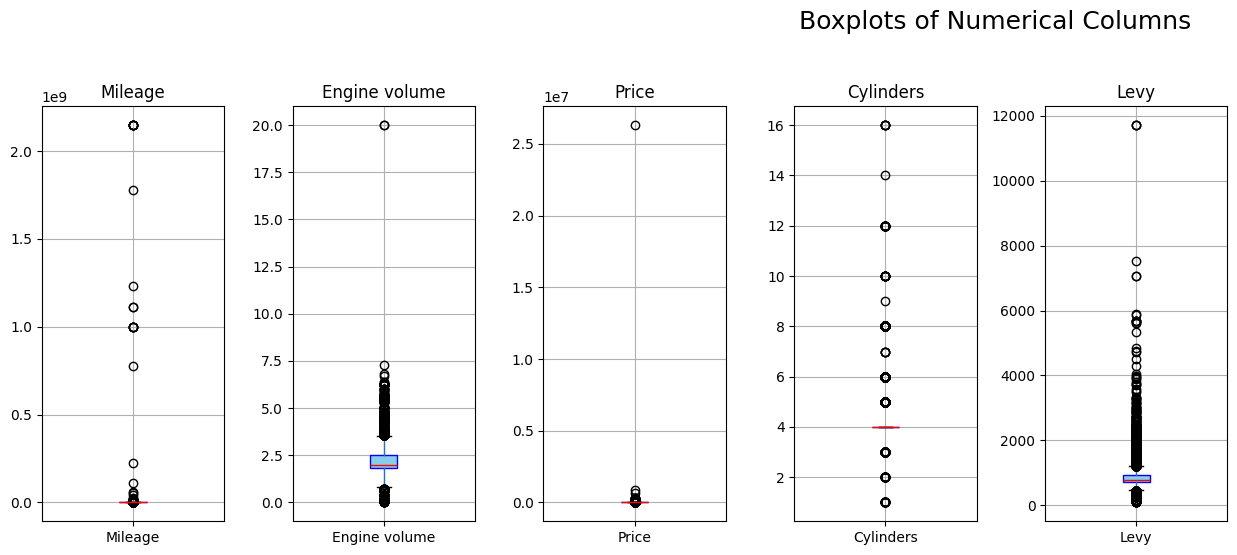

In [ ]:
numerical_cols = ['Mileage', 'Engine volume', 'Price', 'Cylinders', 'Levy']

plt.figure(figsize=(20, 10))
plt.suptitle('Boxplots of Numerical Columns', fontsize=18)
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 8, i)
    df4.boxplot(column=col, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
                 medianprops=dict(color='red'))
    plt.title(col, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
df5 = df4.copy()
df5['Levy_Percentage'] = (df5['Levy'] / df5['Price']) * 100
df5 = df5[(df5["Price"] >= 1000) & (df5["Price"] <= 100000) & (df5['Levy'] < df5['Price']) & (df5['Engine volume'] > 0) & (df5['Levy_Percentage'] <= 15)]

In [ ]:
from scipy.stats import mstats
for col in numerical_cols:
    df5[col] = mstats.winsorize(df5[col], limits=[0.01, 0.04])

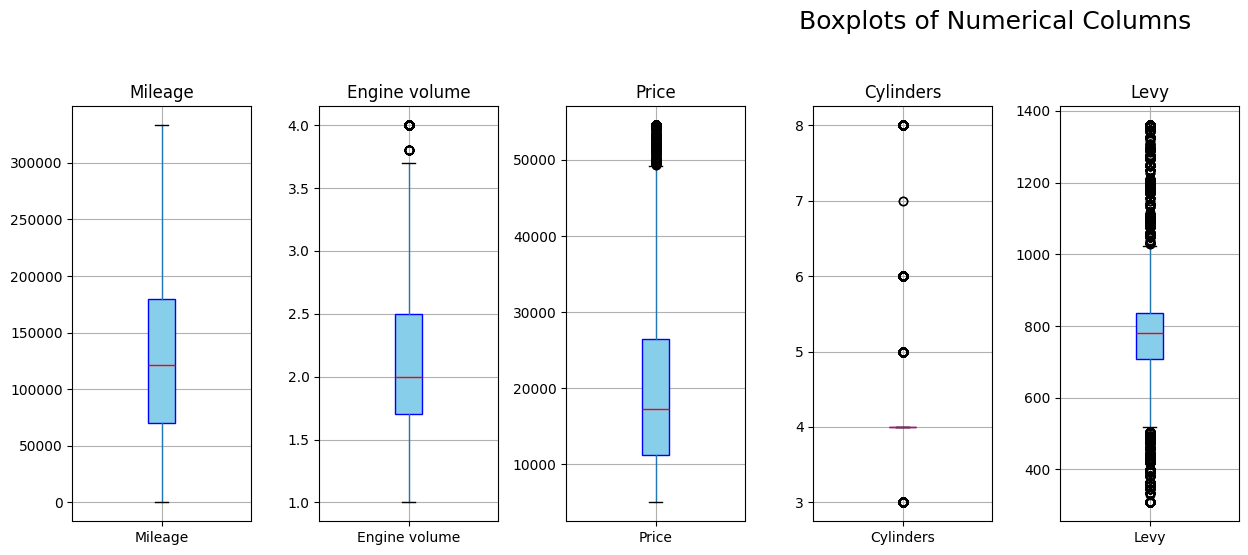

In [ ]:
plt.figure(figsize=(20, 10))
plt.suptitle('Boxplots of Numerical Columns', fontsize=18)
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 8, i)
    df5.boxplot(column=col, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
                 medianprops=dict(color='red'))
    plt.title(col, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
x = df5.drop(['Price','Levy_Percentage'], axis=1)
x.head()

,Levy,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,Age,Turbo,Wheel_Left wheel,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1360.0,1,3.5,186005.0,6.0,4,12,11,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1018.0,0,3.0,192000.0,6.0,4,8,10,0,1,...,0,0,0,0,0,0,0,0,0,0
2,781.0,0,1.3,200000.0,4.0,4,2,15,0,0,...,0,0,0,0,0,0,0,0,0,0
4,446.0,1,1.3,91901.0,4.0,4,4,7,0,1,...,0,0,0,0,0,0,1,0,0,0
5,891.0,1,2.0,160931.0,4.0,4,4,5,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Dependent Variable
y = df5.Price
y.head()

,Price
0,13328
1,16621
2,8467
4,11726
5,39493


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)

In [ ]:
#Baseline Model: Linear Regression.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.4547444918087299

In [ ]:
#K_Fold Cross Validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), x, y, cv= cv)

array([0.46478324, 0.49008997, 0.44657222, 0.45068302, 0.44696057])

In [ ]:
# Find the best regression techniques and hyperparameter tuning. - GridsearchCV
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False]
            }
        },
        'DecisionTree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'absolute_error'],
                'splitter': ['best', 'random']
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'criterion': ['squared_error', 'absolute_error'],
                'max_features': [6, 'sqrt', 'log2']
            }
        },
        'XGBRegressor': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1],
                'subsample': [0.8, 1.0]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, error_score='raise')
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(x, y)

,model,best_score,best_params
0,LinearRegression,0.459818,"{'copy_X': True, 'fit_intercept': True}"
1,DecisionTree,0.589646,"{'criterion': 'squared_error', 'splitter': 'be..."
2,RandomForest,0.760269,"{'criterion': 'squared_error', 'max_features':..."
3,XGBRegressor,0.756624,"{'learning_rate': 0.1, 'n_estimators': 100, 's..."


In [ ]:
#Coding the best model.
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_features=6, random_state=42)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test, y_test)

0.7811710759091616

In [ ]:
cross_val_score(rf_clf, x, y, cv= cv)

array([0.74822557, 0.76693789, 0.76426776, 0.75711374, 0.76701233])

In [ ]:
def predict_price_auto(user_input):
    feature_names = rf_clf.feature_names_in_
    features = []

    for col in feature_names:
        if "_" not in col:

            features.append(user_input.get(col, 0))
        else:

            category, dummy_val = col.split("_", 1)

            if category in user_input:

                if user_input[category].strip().lower() == dummy_val.strip().lower():
                    features.append(1)
                else:
                    features.append(0)
            else:
                features.append(0)


    features_df = pd.DataFrame([features], columns=feature_names)

    predicted_price = rf_clf.predict(features_df)[0]
    return predicted_price


user_input = {
    "Levy": 1500,
    "Leather interior": 1,
    "Engine volume": 2.0,
    "Mileage": 40000,
    "Cylinders": 4,
    "Doors": 4,
    "Airbags": 6,
    "Age": 5,
    "Turbo": 0,
    "Wheel": "Left wheel",
    "Drive wheels": "Front",
    "Gear box type": "Automatic",
    "Fuel type": "Diesel",
    "Color": "Black"
}

predicted = predict_price_auto(user_input)
print("Predicted Price:", predicted)

Predicted Price: 39544.37


In [ ]:
x.columns

Index(['Levy', 'Leather interior', 'Engine volume', 'Mileage', 'Cylinders',
       'Doors', 'Airbags', 'Age', 'Turbo', 'Wheel_Left wheel',
       'Wheel_Right-hand drive', 'Drive wheels_4x4', 'Drive wheels_Front',
       'Drive wheels_Rear', 'Gear box type_Automatic', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator', 'Fuel type_CNG',
       'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_Hydrogen',
       'Fuel type_LPG', 'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid',
       'Color_Beige', 'Color_Black', 'Color_Blue', 'Color_Brown',
       'Color_Carnelian red', 'Color_Golden', 'Color_Green', 'Color_Grey',
       'Color_Orange', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_Silver', 'Color_Sky blue', 'Color_White', 'Color_Yellow'],
      dtype='object')

In [ ]:
#Saving the best model.
import pickle
with open ('car_price_prediction.pickle', 'wb') as f:
    pickle.dump(rf_clf, f)